# BioE C131 Final Project Checkpoint 1
##### Jupyter Notebook prepared by Bryan Ho, Dhuvi Karthikeyan, Edward Han, Joshua Berg, Katie Kim 

In [2]:
import numpy as np 
from Bio import SeqIO
import matplotlib.pyplot as plt 
from wand.image import Image as WImage
import pandas as pd

### SPAdes
The command in the terminal to assemble the genome was: 
```
spades.py -1 SARA_15_S38_L004_R1_001.fastq.gz -2 SARA_15_S38_L004_R2_001.fastq.gz -t 1 -m 16 -o ~/BioE131/final/data/assembly_output
```
Just for version control, Katie ran the assembly on her end and copied over the relevant files to the shared folder. 

Katie copied over the whole output directory to the shared directory by running the command: 
```
cp -r ~/BioE131/final/data/assembly_output/ /bigdata/FinalProject_groups/Group_15
```

### Assembly Statistics
The command in terminal used to generate the assembly statistics was: 
```
assembly-stats ~/BioE131/final/data/assembly_output/contigs.fasta ~/BioE131/final/data/assembly_output/scaffolds.fasta
```
The output was: 
```
sum = 4860754, n = 153, ave = 31769.63, largest = 368527
N50 = 178284, n = 10
N60 = 149278, n = 13
N70 = 90248, n = 18
N80 = 75766, n = 24
N90 = 50109, n = 32
N100 = 56, n = 153
N_count = 0
Gaps = 0
-------------------------------------------------------------------------------
stats for scaffolds.fasta
sum = 4861574, n = 143, ave = 33997.02, largest = 449119
N50 = 223098, n = 8
N60 = 178284, n = 11
N70 = 149858, n = 14
N80 = 90492, n = 18
N90 = 54375, n = 24
N100 = 56, n = 143
N_count = 1000
Gaps = 10
```
The N50 for contigs was 178284 and the total length of all contigs was 4860754. 

For scaffolds, the N50 was 223098 and the total length of all scaffolds was 6678655. 

### Histogram of Contig Lengths


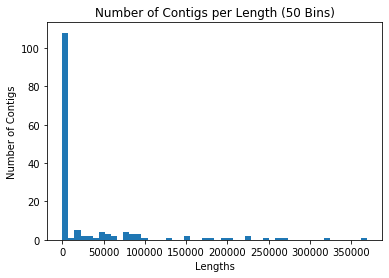

In [4]:
# Parsing through contigs FASTA file for the lengths of each contig
lengths = []
for contig in SeqIO.parse('Genome/contigs.fasta', 'fasta'): 
    length = float(contig.name.split("_")[3])
    lengths.append(length)
plt.hist(lengths, 50)
plt.xlabel('Lengths')
plt.ylabel('Number of Contigs')
plt.title('Number of Contigs per Length (50 Bins)')
plt.show() 

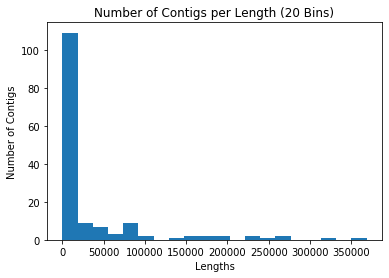

In [5]:
plt.hist(lengths, 20)
plt.xlabel('Lengths')
plt.ylabel('Number of Contigs')
plt.title('Number of Contigs per Length (20 Bins)')
plt.show() 

### Annotations

**RAST Annotation Setup:**\
Taxonomy ID: 90371\
Taxonomy String: Bacteria; Proteobacteria; Gammaproteobacteria; Enterobacterales; Enterobacteriaceae; Salmonella; Salmonella enterica; Salmonella enterica subsp. enterica\
Domain: Bacteria\
Genus: Salmonella\
Species: Enterica\
Strain: subsp. enterica serovar Typhimurium\
Genetic Code: 11 (Archaea, most Bacteria, most Virii, and some Mitochondria)

**RAST Annotation Results:**\
Genome: Salmonella enterica subsp. enterica serovar Typhimurium (Taxonomy ID: 90371)\
Domain: Bacteria\
Taxonomy: Bacteria; Proteobacteria; Gammaproteobacteria; Enterobacterales; Enterobacteriaceae; Salmonella; Salmonella enterica; Salmonella enterica subsp. enterica; Salmonella enterica subsp. enterica serovar Typhimurium \
Closest Neighbors: \
(ID)          (Score)   Genome Name\
(209261.1)	(534)	    Salmonella enterica subsp. enterica serovar Typhi Ty2\
(272620.3)	(498)	    Klebsiella pneumoniae MGH 78578\
(290338.6)	(480)	    Citrobacter koseri ATCC BAA-895\
(198215.1)	(467)	    Shigella flexneri 2a str. 2457T\
(439843.6)	(465)	    Salmonella enterica subsp. enterica serovar Schwarzengrund str. CVM19633\
Size: 4,860,754\
GC Content: 52.2\
N50: 178284\
L50: 10\
Number of Contigs (with PEGs): 153\
Number of Subsystems: 373\
Number of Coding Sequences: 4940\
Number of RNAs: 64

**Basys Annotation Setup:**\
Genome / Contigs Identifer: 90371\
Gram Strain: Negative\
Genus: Salmonella\
Species: Enterica\
Strain: subsp. enterica serovar Typhimurium\
Contig is: Circular\
Genetic Code: Bacterial

Reference Link: https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?mode=Info&id=90371&lvl=3&lin=f&keep=1&srchmode=1&unlock

In [2]:
table = pd.read_excel('90371.3703-genome-annotation.xls')
table

,contig_id,feature_id,type,location,start,stop,strand,function,aliases,figfam,evidence_codes,nucleotide_sequence,aa_sequence
0,NODE_102_length_206_cov_233.774834,fig|90371.3703.repeat.1,repeat,NODE_102_length_206_cov_233.774834_1_206,1,206,+,repeat region,NaN,NaN,NaN,tagtgtggggtctccccatgcgagagtagggaactgccaggcatca...,NaN
1,NODE_103_length_196_cov_320.368794,fig|90371.3703.peg.1,peg,NODE_103_length_196_cov_320.368794_194_3,194,3,-,prophage protein,NaN,NaN,NaN,gaaatgaacctgaaagcagttaataagagcattgctttattcaatt...,EMNLKAVNKSIALFNCEKKVSGVIHSNSTGETTVILDGGYVLGKFD...
2,NODE_108_length_150_cov_254.778947,fig|90371.3703.peg.2,peg,NODE_108_length_150_cov_254.778947_148_2,148,2,-,"Oxaloacetate decarboxylase Na(+) pump, alpha c...",NaN,NaN,NaN,cgcgtcttcgatgccatgaacgacccgcgcaatatgaaagccgccc...,RVFDAMNDPRNMKAALQAVRSHGAHAQGTLSYTTSPAHTLQTWLDLTEQ
3,NODE_108_length_150_cov_254.778947,fig|90371.3703.repeat.2,repeat,NODE_108_length_150_cov_254.778947_9_150,9,150,+,repeat region,NaN,NaN,NaN,gttaaatccagccaggtctgcagggtgtgcgccgggctggtggtgt...,NaN
4,NODE_109_length_147_cov_306.663043,fig|90371.3703.peg.3,peg,NODE_109_length_147_cov_306.663043_146_3,146,3,-,Exodeoxyribonuclease VIII (EC 3.1.11.-),NaN,NaN,NaN,gatctgggtactggtaaagaagcagttaccgtagagaaccagaatc...,DLGTGKEAVTVENQNQAETHQNNDSVSQSEPEAQQNVPESQQEEPEAA
5,NODE_10_length_178284_cov_271.030820,fig|90371.3703.peg.4,peg,NODE_10_length_178284_cov_271.030820_314_1729,314,1729,+,Glutamyl-tRNA synthetase (EC 6.1.1.17),NaN,NaN,isu;Heme_and_Siroheme_Biosynthesis isu;tRNA_am...,atgaaaatcaaaactcgcttcgcgcctagcccgacaggttatctgc...,MKIKTRFAPSPTGYLHVGGARTALYSWLFARHHGGEFVLRIEDTDL...
6,NODE_10_length_178284_cov_271.030820,fig|90371.3703.peg.5,peg,NODE_10_length_178284_cov_271.030820_2175_1783,2175,1783,-,Uncharacterized protein yfeC,NaN,NaN,NaN,atgaaaagattacgcagtaaaatgaccactgaagagctggctgaat...,MKRLRSKMTTEELAECLGVARQTVNRWIREQHWKTEKFPGVKGGRA...
7,NODE_10_length_178284_cov_271.030820,fig|90371.3703.peg.6,peg,NODE_10_length_178284_cov_271.030820_2539_2177,2539,2177,-,Uncharacterized protein yfeC,NaN,NaN,NaN,atgttcaaggaacggatgacgccagaagaactcgctaatctcaccg...,MFKERMTPEELANLTGYSRQTINKWVRKEGWATSPKPGVQGGKARL...
8,NODE_10_length_178284_cov_271.030820,fig|90371.3703.rna.1,rna,NODE_10_length_178284_cov_271.030820_2761_2836,2761,2836,+,tRNA-Ala-GGC,NaN,NaN,idu(1);tRNAs,ggggctatagctcagctgggagagcgcttgcatggcatgcaagagg...,NaN
9,NODE_10_length_178284_cov_271.030820,fig|90371.3703.rna.2,rna,NODE_10_length_178284_cov_271.030820_2879_2954,2879,2954,+,tRNA-Ala-GGC,NaN,NaN,idu(1);tRNAs,ggggctatagctcagctgggagagcgcttgcatggcatgcaagagg...,NaN


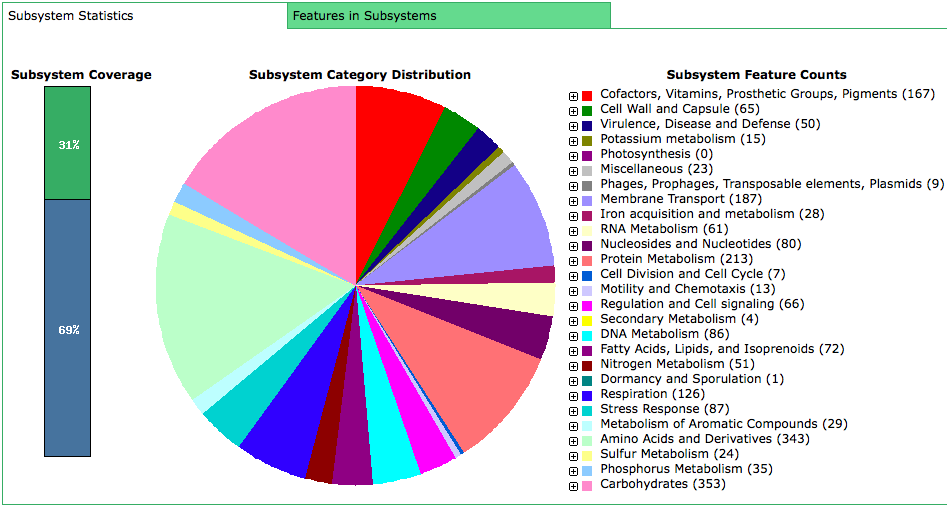

In [3]:
image = WImage(filename = "Subsystem_Info.png")
image

Salmonella enterica are rod-shaped anaerobic Gram-negative bacteria that belong to the Enterobacteriaceae family which is known to be medically important pathogens to both humans and animals. It can be found in the intestinal tract of wild birds, reptiles, and occasionally insects. The spread of Salmonella enterica can be attributed to contamination within foodstuffs as well as in fecal matter which is further spread by insects. Noteably, when it comes to multi-drug resistance, Samonella enterica Typhimurium possesses more the 5 antimicrobials, making rather difficult to purge. Antimicrobial resistance in the Salmonella Genus is confirmed to be attributed to horizontal gene transfer of antibiotic-resistance genes found on copied asreas of Salmonella strains or by clonal spread of antibiotic -resistant serovars. Salmonella develops resistance via the production of an enzymes that degrades cell permeability to antibiotics, activate antimicrobial efflux pumps to physically remove antibiotics, and the production of β-lactamase to denature antimicrobial agents. Thanks to multidrug resistantance, the Salmonella enterica Typhimurium strains have much improved virulence and invasivness than most other Salmonella strains without multi-drug resistance.

Citation: Andino, A., & Hanning, I. (2015). Salmonella enterica: survival, colonization, and virulence differences among serovars. TheScientificWorldJournal, 2015, 520179. doi:10.1155/2015/520179